In [2]:
import librosa
import IPython.display as ipd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import csv
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.cluster import MeanShift, KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

In [3]:
# Dropping unneccesary columns
data = pd.read_csv('extractedmusicfeaturesetallfeatures.csv')
data = data.drop(['Filename'],axis=1) #Filename is not required
data.head()

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,-188.219376,...,6.815101,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714,blues
1,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,-286.179047,...,2.652497,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939,blues
2,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,-165.737717,...,4.676634,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193,blues
3,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,-274.498962,...,5.115472,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497,blues
4,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,-236.696884,...,-6.884608,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401,blues


In [4]:
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F37387148>,
      dtype=object)

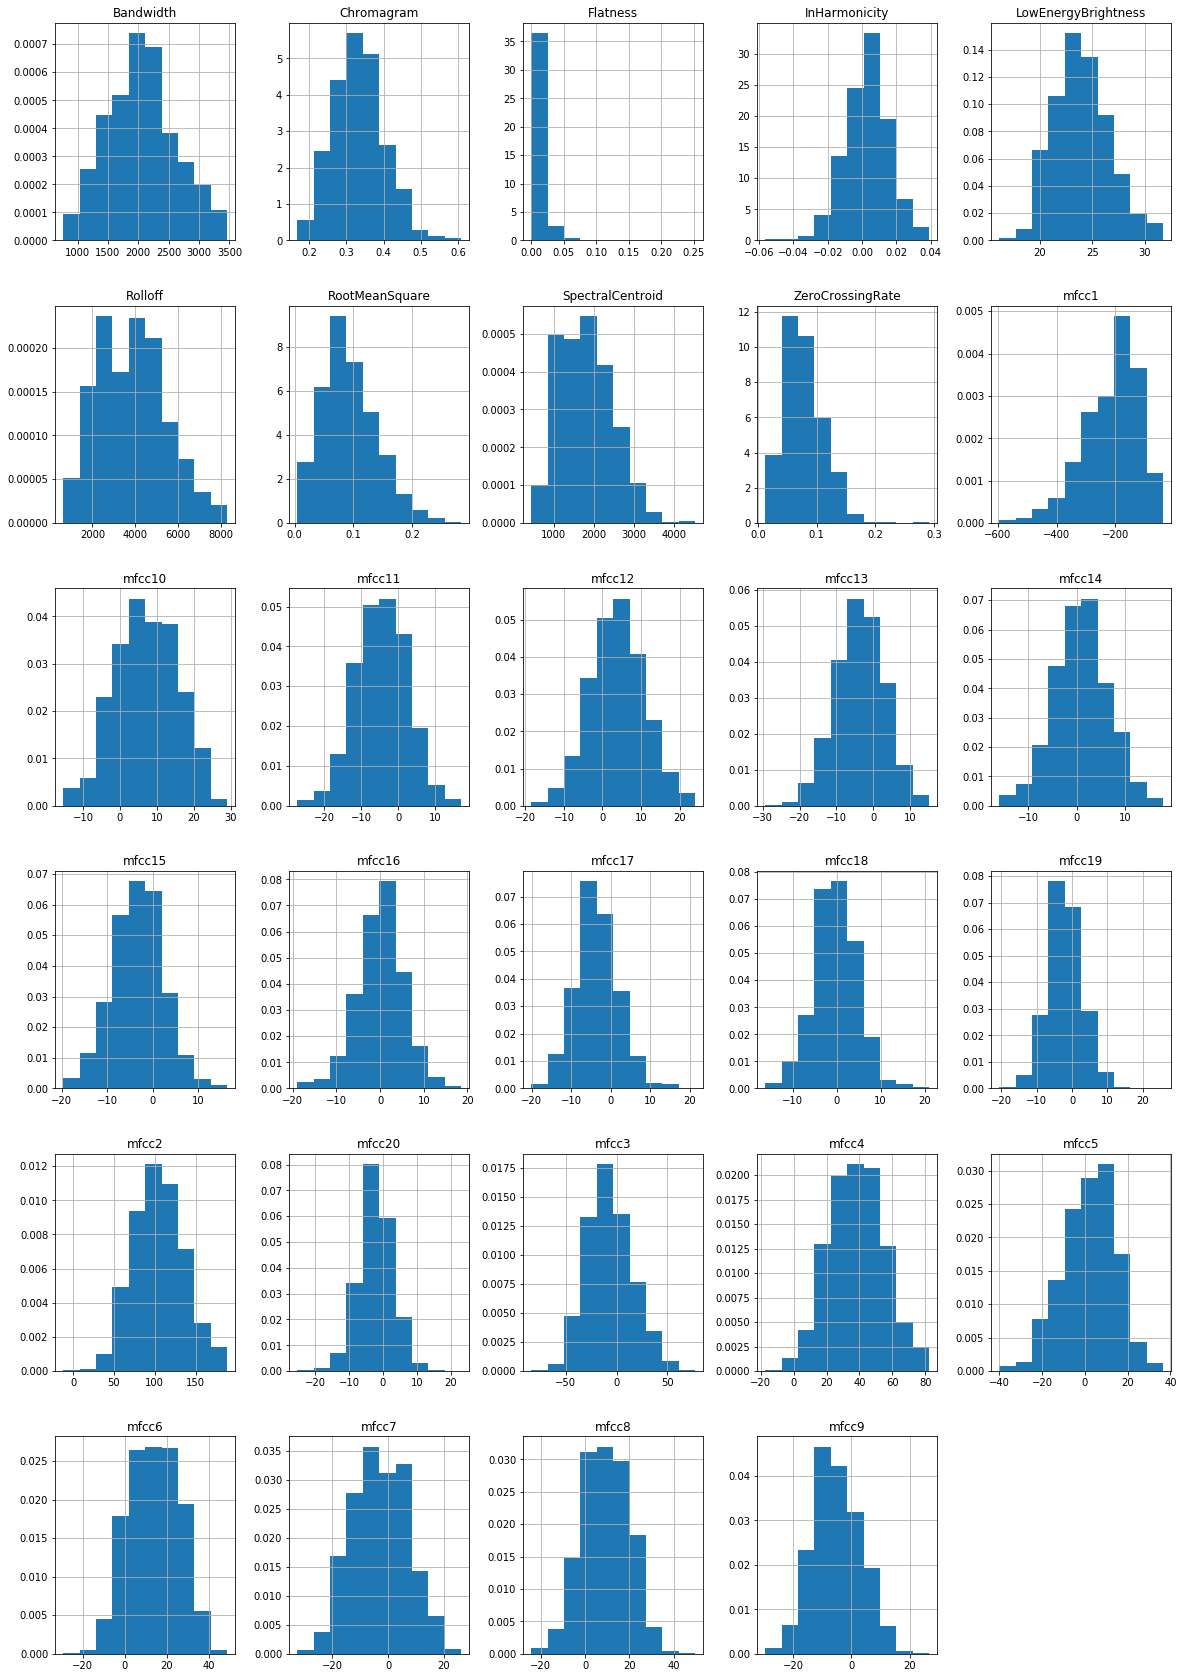

In [8]:
X_prenorm = data[features]
pd.DataFrame(X_prenorm,columns=features).hist(figsize=(20,30), normed=True)

In [9]:
#maybe should be X_prenorm.groupby instead
genre_count = data.groupby('label').agg({'label':'count'})['label']
print(genre_count)

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64


In [10]:
norm = Normalizer()
data[features] = norm.fit_transform(data[features])

In [11]:
genre_groupby = data.groupby('label').agg('mean')
clusters = genre_groupby.reset_index().rename({'label':'cluster'}, axis=1)
clusters['method'] = 'Mean'

oldclusters = clusters
oldclusters

,cluster,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,method
0,blues,0.000094,0.000031,0.008116,0.380853,2.561423e-07,0.498814,1.182952e-06,0.760179,0.000017,...,0.000051,-0.001583,-0.000420,-0.001623,-0.000968,-2.242961e-03,-0.001217,-0.001048,-0.001436,Mean
1,classical,0.000090,0.000013,0.009759,0.422302,1.974365e-07,0.477971,1.701148e-06,0.746459,0.000026,...,-0.000964,-0.000841,-0.000738,-0.000367,0.000032,-5.082764e-09,0.000079,-0.000422,-0.000591,Mean
2,country,0.000088,0.000028,0.007553,0.382816,6.450093e-07,0.488907,6.384716e-07,0.774607,0.000017,...,0.000420,-0.001416,-0.000664,-0.001317,-0.000742,-1.642069e-03,-0.000527,-0.000777,-0.001477,Mean
3,disco,0.000063,0.000016,0.004298,0.381492,1.862054e-06,0.414360,8.114652e-07,0.823642,0.000017,...,0.000913,-0.000936,0.000375,-0.000818,0.000055,-7.101221e-04,0.000058,-0.000422,-0.000081,Mean
4,hiphop,0.000075,0.000022,0.004079,0.366948,2.016517e-06,0.436387,2.106672e-07,0.816721,0.000013,...,0.001499,-0.000080,0.000746,-0.000218,0.000472,-3.990222e-04,0.000161,-0.000235,-0.000363,Mean
5,jazz,0.000080,0.000022,0.007650,0.390184,5.346541e-07,0.484693,5.704848e-07,0.770351,0.000017,...,0.000258,-0.000618,0.000125,-0.000629,-0.000037,-3.063916e-04,-0.000440,-0.000387,-0.000835,Mean
6,metal,0.000074,0.000019,0.004176,0.404584,1.200982e-06,0.384362,5.250807e-07,0.828240,0.000019,...,0.002190,-0.001935,0.000773,-0.001403,0.000671,-1.296081e-03,0.000212,-0.000661,-0.000126,Mean
7,pop,0.000052,0.000021,0.003432,0.363159,2.953799e-06,0.427130,4.309528e-07,0.824355,0.000013,...,0.000116,-0.000075,-0.000151,-0.000056,-0.000159,-2.006397e-05,0.000157,0.000218,0.000047,Mean
8,reggae,0.000091,0.000022,0.005943,0.371722,1.283233e-06,0.484319,4.140522e-07,0.782147,0.000014,...,0.001258,0.000248,0.000360,0.000020,-0.000050,-7.638602e-04,0.000030,-0.000520,-0.000715,Mean
9,rock,0.000075,0.000021,0.005494,0.384927,1.132018e-06,0.446468,7.931914e-07,0.801840,0.000017,...,0.000904,-0.001398,-0.000083,-0.001110,-0.000305,-1.363109e-03,-0.000392,-0.000775,-0.000747,Mean


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F3B1F4988>,
      dtype=object)

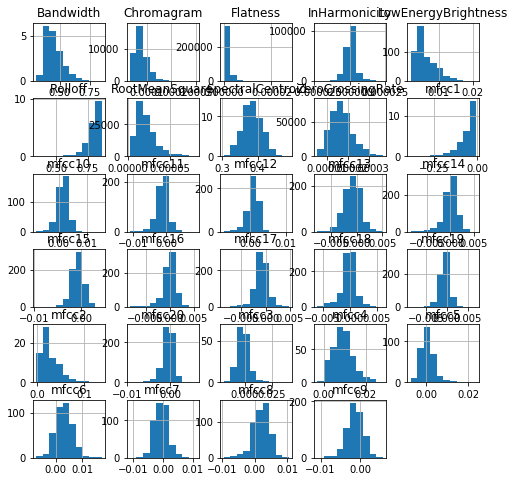

In [12]:
data[features].hist(figsize=(8,8), normed=True)

Text(0.5, 1.0, 'Elbow Method')

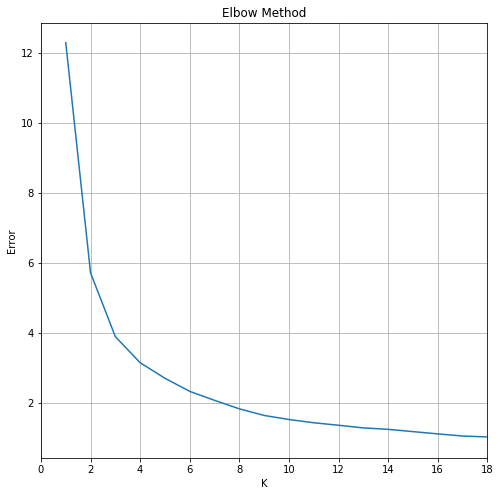

In [13]:
X = data[['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']]

Ks = np.arange(1, 20)
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

Text(0.5, 0, 'K')

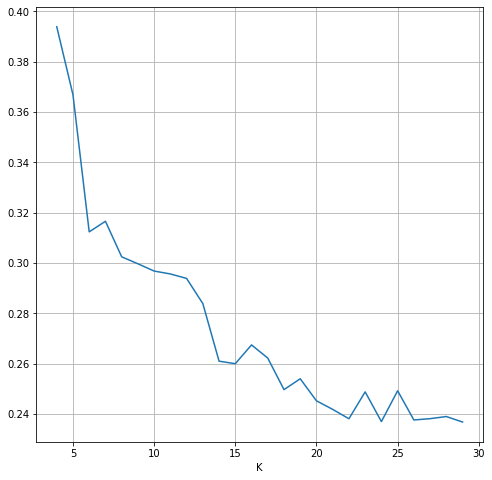

In [14]:
Ks = np.arange(2, 30)
kms = [KMeans(n_clusters=i, random_state=1986).fit(X) for i in Ks]
s_scores = [silhouette_score(X,kms[i].labels_) for i in range(2,len(Ks))]
plt.figure(figsize=(8,8))
plt.plot(Ks[2:len(Ks)],s_scores)
#plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')

In [15]:
X = data[['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']]
km = KMeans(n_clusters=len(genre_groupby), n_init=10, random_state=1986)
km.fit(X)
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
km_clusters = pd.DataFrame(cluster_centers, columns=features)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'
oldclusters = pd.concat([oldclusters, km_clusters])
cols = ['cluster'] + features + ['method']
oldclusters = oldclusters[cols]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [16]:
newclusters = oldclusters

In [17]:
newclusters

,cluster,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,method
0,blues,0.000094,0.000031,0.008116,0.380853,2.561423e-07,0.498814,1.182952e-06,0.760179,0.000017,...,0.000051,-0.001583,-0.000420,-0.001623,-0.000968,-2.242961e-03,-0.001217,-0.001048,-0.001436,Mean
1,classical,0.000090,0.000013,0.009759,0.422302,1.974365e-07,0.477971,1.701148e-06,0.746459,0.000026,...,-0.000964,-0.000841,-0.000738,-0.000367,0.000032,-5.082764e-09,0.000079,-0.000422,-0.000591,Mean
2,country,0.000088,0.000028,0.007553,0.382816,6.450093e-07,0.488907,6.384716e-07,0.774607,0.000017,...,0.000420,-0.001416,-0.000664,-0.001317,-0.000742,-1.642069e-03,-0.000527,-0.000777,-0.001477,Mean
3,disco,0.000063,0.000016,0.004298,0.381492,1.862054e-06,0.414360,8.114652e-07,0.823642,0.000017,...,0.000913,-0.000936,0.000375,-0.000818,0.000055,-7.101221e-04,0.000058,-0.000422,-0.000081,Mean
4,hiphop,0.000075,0.000022,0.004079,0.366948,2.016517e-06,0.436387,2.106672e-07,0.816721,0.000013,...,0.001499,-0.000080,0.000746,-0.000218,0.000472,-3.990222e-04,0.000161,-0.000235,-0.000363,Mean
5,jazz,0.000080,0.000022,0.007650,0.390184,5.346541e-07,0.484693,5.704848e-07,0.770351,0.000017,...,0.000258,-0.000618,0.000125,-0.000629,-0.000037,-3.063916e-04,-0.000440,-0.000387,-0.000835,Mean
6,metal,0.000074,0.000019,0.004176,0.404584,1.200982e-06,0.384362,5.250807e-07,0.828240,0.000019,...,0.002190,-0.001935,0.000773,-0.001403,0.000671,-1.296081e-03,0.000212,-0.000661,-0.000126,Mean
7,pop,0.000052,0.000021,0.003432,0.363159,2.953799e-06,0.427130,4.309528e-07,0.824355,0.000013,...,0.000116,-0.000075,-0.000151,-0.000056,-0.000159,-2.006397e-05,0.000157,0.000218,0.000047,Mean
8,reggae,0.000091,0.000022,0.005943,0.371722,1.283233e-06,0.484319,4.140522e-07,0.782147,0.000014,...,0.001258,0.000248,0.000360,0.000020,-0.000050,-7.638602e-04,0.000030,-0.000520,-0.000715,Mean
9,rock,0.000075,0.000021,0.005494,0.384927,1.132018e-06,0.446468,7.931914e-07,0.801840,0.000017,...,0.000904,-0.001398,-0.000083,-0.001110,-0.000305,-1.363109e-03,-0.000392,-0.000775,-0.000747,Mean


In [18]:
### Assign K-Means Label to Descriptive Labels
descriptive_labels = ["Slow & Somber Acoustics", "Sad Instrumentals", "Upbeat Songs With Cheerful Vocals", 
                      "Fast & Danceable Instrumentals", "Fast, Upbeat & Cheerful Songs", "Happy & Upbeat Instrumentals",
                      "Aggressive, Fast Paced Acoustics", "Slow Happy Dance", "Happy & Slow", "Fast, Upbeat & Cheerful Acoustics"]
unique_labels = np.unique(labels)
translated_labels = dict(zip(unique_labels, descriptive_labels))
data['KMeansLabel'] = list(map(lambda x:translated_labels[x], labels))

genre_count = data.groupby('label').agg({'label':'count'})['label']

# How many instances of each k-means cluster are there?
print("### Instances of KMeans Cluster ###")
print(data[['label', 'KMeansLabel']].groupby('KMeansLabel').agg('count'))

# Which cluster corresponds to the most instances per genre?
print("### Which cluster corresponds to the most instances per genre? ###")
print(data[['label', 'KMeansLabel']].groupby('label').agg(lambda x:x.value_counts().index[0]))

# Which genre corresponds to the most instances per cluster?
print("### Which genre corresponds to the most instances per cluster? ###")
print(data[['label', 'KMeansLabel']].groupby('KMeansLabel').agg(lambda x:x.value_counts().index[0]))

### Instances of KMeans Cluster ###
                                   label
KMeansLabel                             
Aggressive, Fast Paced Acoustics     103
Fast & Danceable Instrumentals        35
Fast, Upbeat & Cheerful Acoustics     78
Fast, Upbeat & Cheerful Songs        159
Happy & Slow                         151
Happy & Upbeat Instrumentals          12
Sad Instrumentals                    221
Slow & Somber Acoustics               34
Slow Happy Dance                      84
Upbeat Songs With Cheerful Vocals    123
### Which cluster corresponds to the most instances per genre? ###
                                 KMeansLabel
label                                       
blues      Fast, Upbeat & Cheerful Acoustics
classical                   Slow Happy Dance
country    Upbeat Songs With Cheerful Vocals
disco                      Sad Instrumentals
hiphop                     Sad Instrumentals
jazz       Upbeat Songs With Cheerful Vocals
metal                           Happy & Slow


In [19]:
y_true = data['label']
y_pred = data['KMeansLabel']
metrics = {'adjusted_rand_score':adjusted_rand_score, 
           'adjusted_mutual_info_score':adjusted_mutual_info_score, 
           'v_measure_score':v_measure_score
          }

scores = dict(zip(metrics.keys(), [metrics[m](y_true, y_pred) for m in metrics.keys()]))
scores['silhouette_score'] = silhouette_score(X,y_pred)
for k,v in scores.items():
    print("Metric: {} Score: {}".format(k, v))

Metric: adjusted_rand_score Score: 0.11547242184249254
Metric: adjusted_mutual_info_score Score: 0.18941810520725275
Metric: v_measure_score Score: 0.21404572899895544
Metric: silhouette_score Score: 0.2968615978807961


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
x,y = zip(*X_new)
data['x'] = x
data['y'] = y
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

In [21]:
audio_components = dict(list(zip(features, zip(*np.round(components,2)))))
audio_components

{'Chromagram': (0.0, 0.0),
 'RootMeanSquare': (0.0, -0.0),
 'LowEnergyBrightness': (0.03, 0.03),
 'SpectralCentroid': (0.01, 0.62),
 'Flatness': (-0.0, -0.0),
 'Bandwidth': (0.69, -0.5),
 'InHarmonicity': (0.0, 0.0),
 'Rolloff': (-0.54, -0.11),
 'ZeroCrossingRate': (-0.0, 0.0),
 'mfcc1': (-0.45, -0.56),
 'mfcc2': (0.17, 0.18),
 'mfcc3': (0.03, -0.07),
 'mfcc4': (0.02, 0.0),
 'mfcc5': (0.02, -0.02),
 'mfcc6': (0.0, -0.02),
 'mfcc7': (0.0, -0.02),
 'mfcc8': (-0.0, -0.02),
 'mfcc9': (-0.0, -0.02),
 'mfcc10': (-0.01, -0.01),
 'mfcc11': (-0.0, -0.02),
 'mfcc12': (-0.01, -0.01),
 'mfcc13': (-0.0, -0.01),
 'mfcc14': (-0.01, -0.01),
 'mfcc15': (-0.0, -0.0),
 'mfcc16': (-0.01, -0.0),
 'mfcc17': (-0.0, 0.0),
 'mfcc18': (-0.0, 0.0),
 'mfcc19': (-0.0, -0.0),
 'mfcc20': (-0.01, 0.0)}

In [22]:
singular_values

array([3.17673917, 1.20743642])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Clustering by Genre, Reduced Dimension')

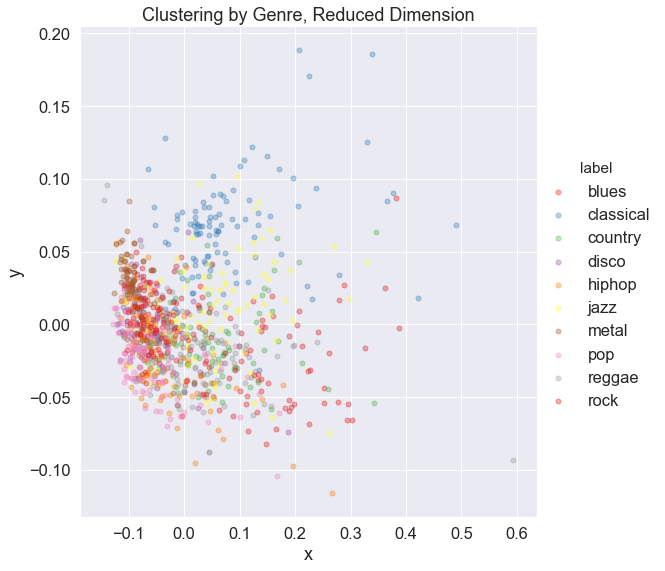

In [23]:
sns.set(font_scale=1.5)
sns.lmplot(data=data, x='x', y='y', hue='label', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.savefig('pca_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")

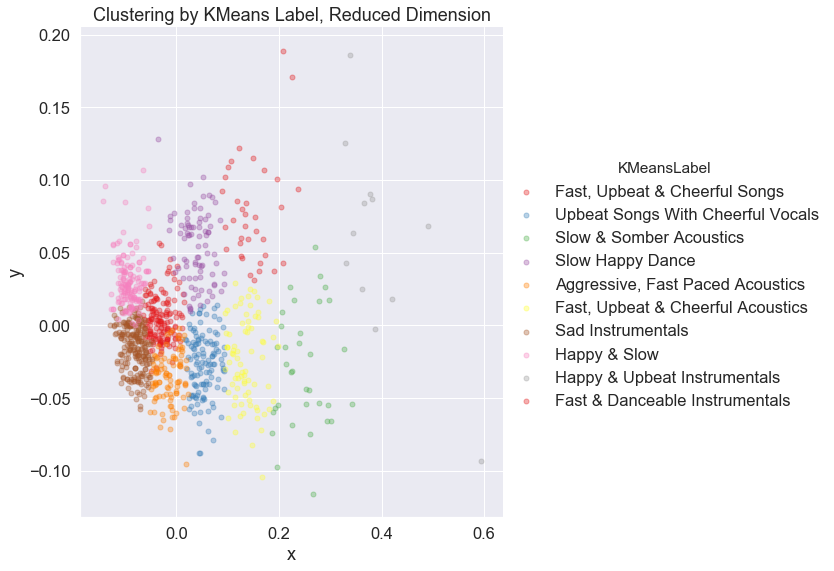

In [24]:
sns.set(font_scale=1.5)
sns.lmplot(data=data, x='x', y='y', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans Label, Reduced Dimension")
plt.savefig('pca_scatter_KM.png')

In [25]:
data

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,KMeansLabel,x,y
0,0.000077,0.000021,0.005951,0.385474,4.333133e-07,0.460558,1.716537e-07,0.797426,0.000018,-0.047265,...,-0.000451,-0.000449,0.000086,-0.000660,-0.000078,-0.000184,blues,"Fast, Upbeat & Cheerful Songs",-0.003421,-0.009684
1,0.000094,0.000020,0.007507,0.366620,1.971962e-07,0.535032,5.865401e-06,0.754630,0.000014,-0.089040,...,-0.001546,-0.000315,0.000310,-0.000188,0.000487,-0.000213,blues,Upbeat Songs With Cheerful Vocals,0.091524,-0.029452
2,0.000092,0.000038,0.007815,0.404323,2.365064e-07,0.490022,6.900334e-06,0.768983,0.000020,-0.051406,...,-0.002693,0.000170,-0.002333,-0.001418,-0.001238,-0.001220,blues,Upbeat Songs With Cheerful Vocals,0.036682,-0.004354
3,0.000183,0.000057,0.011384,0.370291,1.158668e-07,0.623623,4.184518e-06,0.671076,0.000012,-0.132756,...,0.000096,0.000589,-0.000366,0.000880,-0.000028,-0.001939,blues,Slow & Somber Acoustics,0.223565,-0.031965
4,0.000071,0.000016,0.006764,0.416164,3.606689e-07,0.428226,-1.372337e-05,0.798630,0.000023,-0.063988,...,-0.002931,-0.002205,-0.001471,-0.000516,-0.001918,-0.004759,blues,"Fast, Upbeat & Cheerful Songs",-0.018061,0.036324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000074,0.000016,0.006396,0.378084,3.507344e-07,0.447791,-4.842178e-06,0.807936,0.000016,-0.050827,...,-0.002115,-0.000227,-0.003024,0.000177,-0.001154,-0.000731,rock,"Fast, Upbeat & Cheerful Songs",-0.016741,-0.007239
996,0.000082,0.000014,0.006330,0.397971,4.111878e-07,0.441644,-3.054031e-06,0.801993,0.000019,-0.046613,...,-0.000377,0.000128,-0.002561,-0.000152,-0.001747,-0.001370,rock,"Fast, Upbeat & Cheerful Songs",-0.019532,0.006656
997,0.000084,0.000014,0.005971,0.412492,5.132109e-07,0.407817,8.641789e-07,0.812798,0.000024,-0.041499,...,-0.002647,-0.000467,-0.002965,0.000067,-0.002972,-0.001470,rock,"Fast, Upbeat & Cheerful Songs",-0.051220,0.028475
998,0.000114,0.000025,0.009051,0.364899,1.089268e-07,0.539733,7.239577e-06,0.750349,0.000013,-0.099519,...,-0.001576,-0.002018,-0.001075,0.000058,-0.001535,-0.001950,rock,"Fast, Upbeat & Cheerful Acoustics",0.102640,-0.025254


In [26]:
data = data
X = pd.DataFrame(data)
#X = X.drop(['label','KMeansLabel','x','y'],axis=1)
X = np.array(X)
X = data.drop(['label', 'KMeansLabel'], axis=1)
Y = data['KMeansLabel']
Y = np.array(Y)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(principalDf)
X_train, X_test, y_train, y_test = train_test_split(principalDf, Y, test_size=0.15, random_state=42)

     principal component 1  principal component 2  principal component 3
0                -0.004838              -0.013696              -0.007646
1                 0.129435              -0.041652               0.006337
2                 0.051877              -0.006158              -0.031320
3                 0.316168              -0.045206              -0.008009
4                -0.025542               0.051370              -0.011991
..                     ...                    ...                    ...
995              -0.023676              -0.010237               0.004711
996              -0.027623               0.009413              -0.012447
997              -0.072436               0.040270              -0.016706
998               0.145155              -0.035715               0.011878
999               0.034826               0.019053               0.004848

[1000 rows x 3 columns]


In [27]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.32666666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred = svclassifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0  0  0  8  0 11  0  0  0]
 [ 0  0  1  0  0  0  0  1  0]
 [ 0  0  2  0  0  0  0  0 16]
 [ 0  0  0  8  0 17  0  0  0]
 [ 0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0 27  0  0  0]
 [ 0  0  6  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  3  3]
 [ 0  0  0  0  0  0  0  0 17]]
                                   precision    recall  f1-score   support

 Aggressive, Fast Paced Acoustics       0.00      0.00      0.00        19
   Fast & Danceable Instrumentals       0.00      0.00      0.00         2
Fast, Upbeat & Cheerful Acoustics       0.22      0.11      0.15        18
    Fast, Upbeat & Cheerful Songs       0.42      0.32      0.36        25
                     Happy & Slow       0.00      0.00      0.00        27
                Sad Instrumentals       0.33      1.00      0.50        27
          Slow & Somber Acoustics       0.00      0.00      0.00         6
                 Slow Happy Dance       0.75      0.33      0.46         9
Upbeat Songs With Cheerful Vocals       0.47      1.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
